# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
#Obervation 1: With Lat vs Temperature, we can see that as the latitude increases beyond 20 or decreases belowe -20 then the temperature will also decrease. It also makes sense to note that the highest temperature lies around the equator
#Observation 2: Although cloudiness is very random/scattered, we can see that in the northern hemisphere there is a higher percentage of clouds ranging 50% and above noting that there are more instances of cloudiness at 100%
#Observation 3: From the linear regression data for windspeed, the windspeed gradually increases the further north we go within the northern hemisphere whereas for the southern hemisphere the further north or closer to the equator we go, the wind decreases. 
                # But the wind speed increase/decrease is minimal. 

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [4]:
lat_lngs

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url =  "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
print("Beginning Data Retrieval")
print("-----------------------------")
city_counter = 0
city_stat = []
for locations in cities:
    city_counter += 1
    city_url = url + "&q=" + locations 
    print("Processing record set", city_counter, "of", len(cities), "with the city named", locations,)
    
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_stat.append({"City":locations, "Latitude": city_lat, "Longitude": city_lng, 
                          "Max Temperature": city_max_temp, "Humidity": city_humidity, 
                         "Clouds": city_clouds, "Wind": city_wind, "Country": city_country,
                         "Date": city_date})
    except:
        print("Error, city not found")
        pass


Beginning Data Retrieval
-----------------------------
Processing record set 1 of 609 with the city named camuy
Processing record set 2 of 609 with the city named iquique
Processing record set 3 of 609 with the city named grand river south east
Error, city not found
Processing record set 4 of 609 with the city named havoysund
Processing record set 5 of 609 with the city named bundaberg
Processing record set 6 of 609 with the city named tasiilaq
Processing record set 7 of 609 with the city named rikitea
Processing record set 8 of 609 with the city named esperance
Processing record set 9 of 609 with the city named mount gambier
Processing record set 10 of 609 with the city named bredasdorp
Processing record set 11 of 609 with the city named hilo
Processing record set 12 of 609 with the city named avarua
Processing record set 13 of 609 with the city named kampene
Processing record set 14 of 609 with the city named kodiak
Processing record set 15 of 609 with the city named talnakh
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_stat
city_stat_pd = pd.DataFrame(city_stat)
city_stat_pd
city_stat_pd.to_csv('output_data/RetrievedData.csv')


In [8]:

# weather_df = pd.DataFrame({
#     "City":len(location_name),
#     "Country":len(location_country),
#     "Date":len(date),
#     "Latitude":len(latitude),
#     "Longitude":len(longitude),
#     "Max Temp(f)":len([city_max_temp]),
#     "Humidity":len([city_humidity]),
#     "Wind Speed":len([city_wind]),
#     "Cloudiness":len([city_clouds]),
# weather_df

        
       # city_lat = city_weather["coord"]["lat"]
       # city_lng = city_weather["coord"]["lon"]
       # city_max_temp = city_weather["main"]["temp_max"]
       # city_humidity = city_weather["main"]["humidity"]
        #city_clouds = city_weather["clouds"]["all"]
        #city_wind = city_weather["wind"]["speed"]
        #city_country = city_weather["sys"]["country"]
        #city_date = city_weather["dt"]
city_stat_pd = pd.DataFrame(city_stat)
city_stat_pd.count()

    

City               560
Latitude           560
Longitude          560
Max Temperature    560
Humidity           560
Clouds             560
Wind               560
Country            560
Date               560
dtype: int64

In [9]:
city_stat_pd.to_csv(output_data_file)
city_stat_pd.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind,Country,Date
0,camuy,18.4838,-66.8449,84.13,68,100,5.01,PR,1624746130
1,iquique,-20.2208,-70.1431,60.84,80,98,7.72,CL,1624746130
2,havoysund,70.9963,24.6622,47.28,87,100,5.37,NO,1624746131
3,bundaberg,-24.8500,152.3500,55.69,94,90,9.22,AU,1624746131
4,tasiilaq,65.6145,-37.6368,50.16,62,2,7.72,GL,1624746132


In [10]:
#working on it,
lat_vs_temp = city_stat_pd.groupby(city_stat)[['Latitude','Max Temperature']]
lat_vs_temp.head()

,Latitude,Max Temperature
0,18.4838,84.13
1,-20.2208,60.84
2,70.9963,47.28
3,-24.8500,55.69
4,65.6145,50.16


In [11]:
#working on it,
lat_vs_humid = city_stat_pd.groupby(city_stat)[['Latitude','Humidity']]
lat_vs_humid.head()

,Latitude,Humidity
0,18.4838,68
1,-20.2208,80
2,70.9963,87
3,-24.8500,94
4,65.6145,62


In [12]:
#working on it,
lat_vs_cloud = city_stat_pd.groupby(city_stat)[['Latitude','Clouds']]
lat_vs_cloud.head()

,Latitude,Clouds
0,18.4838,100
1,-20.2208,98
2,70.9963,100
3,-24.8500,90
4,65.6145,2


In [13]:
lat_vs_wind = city_stat_pd.groupby(city_stat)[['Latitude', 'Wind']]
lat_vs_wind.head()

,Latitude,Wind
0,18.4838,5.01
1,-20.2208,7.72
2,70.9963,5.37
3,-24.8500,9.22
4,65.6145,7.72


In [14]:
count = city_stat_pd.count()
count = count.drop(['City','Country'])
count

Latitude           560
Longitude          560
Max Temperature    560
Humidity           560
Clouds             560
Wind               560
Date               560
dtype: int64

In [15]:
#mean = city_stat_pd.groupby(city_stat)['Latitude'].mean()
mean = city_stat_pd.mean()
mean

Latitude           1.846121e+01
Longitude          1.803944e+01
Max Temperature    6.931039e+01
Humidity           7.169643e+01
Clouds             5.627500e+01
Wind               7.212071e+00
Date               1.624746e+09
dtype: float64

In [16]:
median = city_stat_pd.median()
median

Latitude           2.088070e+01
Longitude          2.374805e+01
Max Temperature    7.158000e+01
Humidity           7.800000e+01
Clouds             7.300000e+01
Wind               6.060000e+00
Date               1.624746e+09
dtype: float64

In [17]:
standard_dv = city_stat_pd.std()
standard_dv

Latitude           33.598802
Longitude          91.867662
Max Temperature    14.654428
Humidity           20.964933
Clouds             39.210994
Wind                4.796379
Date               81.795954
dtype: float64

In [18]:
weather_min = city_stat_pd.min()
weather_min.drop(['City','Country'])

Latitude                -54.8
Longitude              -175.2
Max Temperature         29.75
Humidity                    6
Clouds                      0
Wind                        0
Date               1624745835
dtype: object

In [19]:
weather_quartile = city_stat_pd.quantile([0.25,0.5,0.75])
weather_quartile


,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind,Date
0.25,-8.4667,-59.99895,58.165,61.0,14.0,3.8325,1.624746e+09
0.50,20.8807,23.74805,71.580,78.0,73.0,6.0600,1.624746e+09
0.75,46.5752,98.78150,79.710,87.0,96.0,9.2450,1.624746e+09


In [20]:
weather_max = city_stat_pd.max()
weather_max = weather_max.drop(['City','Country'])
weather_max

Latitude              78.2186
Longitude             178.417
Max Temperature        111.79
Humidity                  100
Clouds                    100
Wind                    26.17
Date               1624746336
dtype: object

In [21]:
# sum_city = count
# sum_city = mean
# sum_city = median
# sum_city = standard_dv
# sum_city = weather_min, 
# sum_city = weather_quartile
# sum_city = weather_max
# sum_city.drop(['City','Country'])
sum_city = (count, mean, median, standard_dv,weather_min, weather_quartile, weather_max)
sum_city

(Latitude           560
 Longitude          560
 Max Temperature    560
 Humidity           560
 Clouds             560
 Wind               560
 Date               560
 dtype: int64,
 Latitude           1.846121e+01
 Longitude          1.803944e+01
 Max Temperature    6.931039e+01
 Humidity           7.169643e+01
 Clouds             5.627500e+01
 Wind               7.212071e+00
 Date               1.624746e+09
 dtype: float64,
 Latitude           2.088070e+01
 Longitude          2.374805e+01
 Max Temperature    7.158000e+01
 Humidity           7.800000e+01
 Clouds             7.300000e+01
 Wind               6.060000e+00
 Date               1.624746e+09
 dtype: float64,
 Latitude           33.598802
 Longitude          91.867662
 Max Temperature    14.654428
 Humidity           20.964933
 Clouds             39.210994
 Wind                4.796379
 Date               81.795954
 dtype: float64,
 City                   abalak
 Latitude                -54.8
 Longitude              -175.2
 

In [57]:
#working on it
# count = city_stat_pd.count()
# mean = city_stat_pd.mean()
# median = city_stat_pd.median()
# standard_dv = city_stat_pd.std()
# weather_min = city_stat_pd.min()
# weather_quartile = city_stat_pd.quantile([0.25,0.5,0.75])
# weather_max = city_stat_pd.max
#data = [[count, mean, median, standard_dv, weather_min, weather_quartile, weather_max]]
#summary_df = pd.DataFrame({"Lat": [city_lat], "Lng": [city_lng], "Max Temp": [city_max_temp],"Humidity": [city_humidity], "Cloudiness": [city_clouds], "Wind Speed": [city_wind], "Date": [city_date]})
#summary_df.describe()
#sum_df = pd.DataFrame(count, mean, median, standard_dv, weather_min, weather_quartile, weather_max, columns = ['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date'])

# summary = ({'Lat': count, 'Lng': mean, 'Max Temp': median, 'Humidity':standard_dv, 'Cloudiness':weather_min, 'Wind Speed':weather_quartile, 'Date':weather_max})
# summary = pd.DataFrame(summary)
# summary 

# summary = pd.DataFrame(columns = ['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date'])
city_stat_pd.describe().to_csv('Describe.csv')
city_stat_pd.describe()

,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,18.461212,18.039443,69.310393,71.696429,56.275000,7.212071,1.624746e+09
std,33.598802,91.867662,14.654428,20.964933,39.210994,4.796379,8.179595e+01
min,-54.800000,-175.200000,29.750000,6.000000,0.000000,0.000000,1.624746e+09
25%,-8.466700,-59.998950,58.165000,61.000000,14.000000,3.832500,1.624746e+09
50%,20.880700,23.748050,71.580000,78.000000,73.000000,6.060000,1.624746e+09
75%,46.575200,98.781500,79.710000,87.000000,96.000000,9.245000,1.624746e+09
max,78.218600,178.416700,111.790000,100.000000,100.000000,26.170000,1.624746e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
max_humid = city_stat_pd[['Humidity']].max()
max_humid
#max_humid = max('Humidity')

#print('Max Humidity:', max_humid)

Humidity    100
dtype: int64

In [24]:
#no humidity over 100

In [25]:
#  Get the indices of cities that have humidity over 100%.


In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

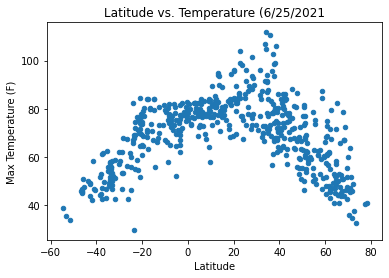

In [27]:
lat_vs_temp = city_stat_pd.plot.scatter(x="Latitude", y="Max Temperature")
plt.title('Latitude vs. Temperature (6/25/2021')
plt.ylabel('Max Temperature (F)')
plt.savefig("output_data/LatvsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

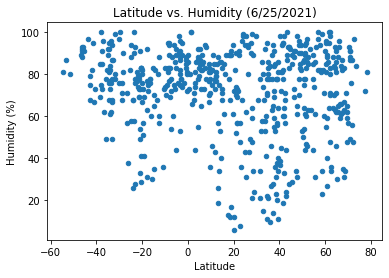

In [28]:
lat_vs_humid = city_stat_pd.plot.scatter(x ='Latitude', y ='Humidity')
plt.title('Latitude vs. Humidity (6/25/2021)')
plt.ylabel('Humidity (%)')
plt.savefig("output_data/LatvsHum.png")
plt.show()

## Latitude vs. Cloudiness Plot

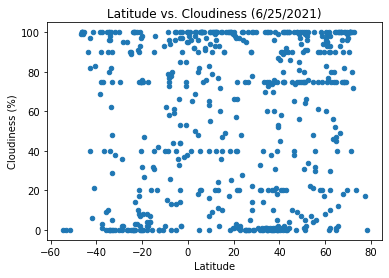

In [29]:
lat_vs_cloud = city_stat_pd.plot.scatter(x='Latitude', y ='Clouds')
plt.title('Latitude vs. Cloudiness (6/25/2021)')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/LatvsCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

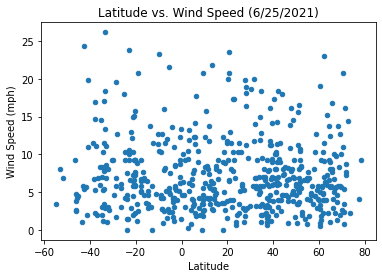

In [30]:
lat_vs_wind = city_stat_pd.plot.scatter(x = 'Latitude', y ='Wind')
plt.title('Latitude vs. Wind Speed (6/25/2021)')
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data/LatvsWind.png")
plt.show()

## Linear Regression

In [31]:
north_hemisphere_df = city_stat_pd.loc[(city_stat_pd["Latitude"]>= 0)]
south_hemisphere_df = city_stat_pd.loc[(city_stat_pd["Latitude"]< 0)]

In [32]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=18,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.43683444137850364


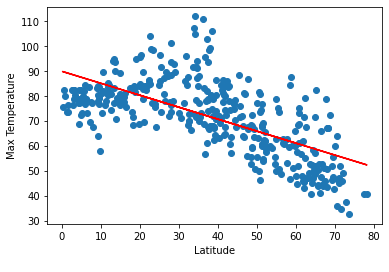

In [33]:
x_values = north_hemisphere_df["Latitude"]
y_values = north_hemisphere_df["Max Temperature"]
plot_linear_regression(x_values, y_values, 'Max Temperature', (6,14))
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6286178975475748


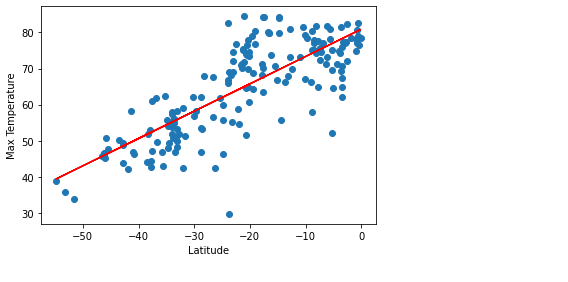

In [34]:
x_values = south_hemisphere_df["Latitude"]
y_values = south_hemisphere_df["Max Temperature"]
plot_linear_regression(x_values, y_values, 'Max Temperature', (6,14))
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 5.512702806187959e-06


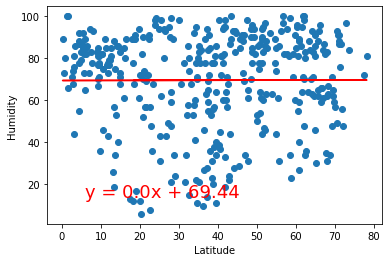

In [35]:
x_values = north_hemisphere_df["Latitude"]
y_values = north_hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (6,14))
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00578709685935563


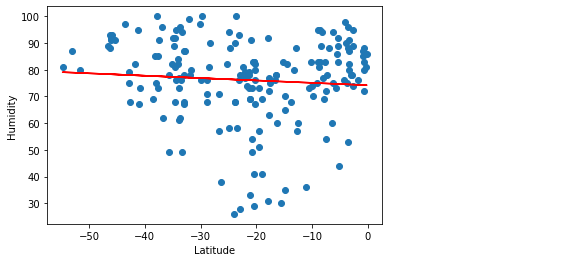

In [36]:
x_values = south_hemisphere_df["Latitude"]
y_values = south_hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (6,14))
plt.show() 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.000818977378494658


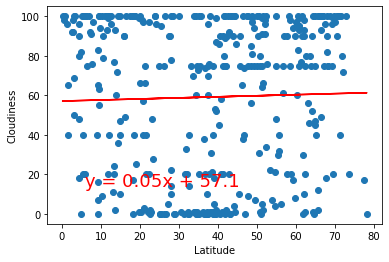

In [37]:
x_values = north_hemisphere_df["Latitude"]
y_values = north_hemisphere_df["Clouds"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (6,14))
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0010140373970416007


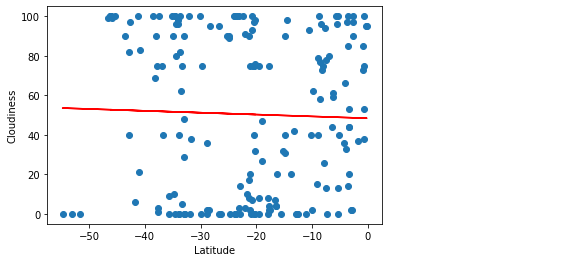

In [38]:
x_values = south_hemisphere_df["Latitude"]
y_values = south_hemisphere_df["Clouds"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (6,14))
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0009501729052989657


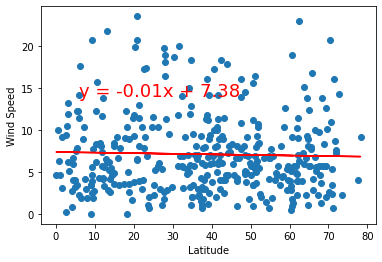

In [39]:
x_values = north_hemisphere_df["Latitude"]
y_values = north_hemisphere_df["Wind"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (6,14))
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.004044939576613976


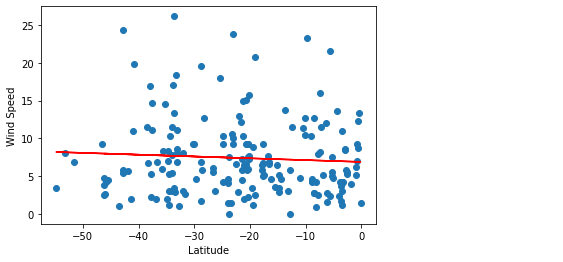

In [40]:
x_values = south_hemisphere_df["Latitude"]
y_values = south_hemisphere_df["Wind"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (6,14))
plt.show()
